<a href="https://colab.research.google.com/github/zelladh/Churn-Prediction-Project/blob/main/Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello and welcome to my project. I am Dhanush Tella. The data set I am using is called Bank Customer Churn Dataset and was made or published by Bhuvi Ranga. I am currently trying to predict whether a customer will churn or not. Enjoy the expirement!

Link to my slides: https://docs.google.com/presentation/d/1hbBr9CIrxDNAFmvibcjaEtWDLF9FeIaJI1Z8M2rpaZU/edit?usp=sharing

Link to my dataset: https://www.kaggle.com/datasets/bhuviranga/customer-churn-data

# Background

My initial question for this project was: Can churn be predicted?

Churn is when a customer or a client turns to a different service or company for the same services. Without machine learning, this is almost impossible to predict.


The data is in the perspective of a bank using a dataset of clients who have churned and those who have not with all their characteristics.


The problem is no company and especially no bank wants any of their customers to churn. Unfortunately, they are and in great numbers. The solution is to create an algorithm to find the most probable customer to churn and to prevent churn with exclusives and feedback.


# Data Science

# Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/zelladh/Churn-Prediction-Project/main/Bank%20Customer%20Churn%20Prediction%20(2).csv')
#Intiailizing the dataframe

df.drop("customer_id", axis='columns', inplace = True)
df.drop("products_number", axis='columns', inplace = True)
df = pd.get_dummies(df)
#Removing text columns
df.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

df = pd.get_dummies(df)

df['balance'] = df['balance'] / df['balance'].max()

y = df['churn'].copy(deep = True)
# Sets y or Prediction variable as Churn
x = df.copy(deep = True)
x.drop(['churn'], axis = 1, inplace = True)

log_model = LogisticRegression()
# Setting the Model to Logitic Regression
log_model.fit(x, y)
#Fitting the Model
log_model.score(x, y)
#Scoring the Model

0.7878

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
#Splitting the x and y to train and test datasets


In [ ]:
print(y_train.value_counts()) #That is really bad, we have to resample to develop a working model

0    5988
1    1512
Name: churn, dtype: int64


In [ ]:
#Sets the oversampler
over_sampler = SMOTE()
x_train_resample, y_train_resample = over_sampler.fit_resample(x_train, y_train) #Sets the two and keeps and maintains the testing data as it is.
print(y_train_resample.value_counts()) #Checking the values to make sure that it worked

0    5988
1    5988
Name: churn, dtype: int64


Here is some info about the data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   credit_card       10000 non-null  int64  
 5   active_member     10000 non-null  int64  
 6   estimated_salary  10000 non-null  float64
 7   churn             10000 non-null  int64  
 8   country_France    10000 non-null  uint8  
 9   country_Germany   10000 non-null  uint8  
 10  country_Spain     10000 non-null  uint8  
 11  gender_Female     10000 non-null  uint8  
 12  gender_Male       10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 674.0 KB


#Functions

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'max_depth': [2], 'subsample': [0.6], 'colsample_bylevel':[0,1], 'colsample_bytree': [0,1]} # Test Params

def GridSearch(model, params, random = False): #Intailizes the function

  if random:
    grid_reg = RandomizedSearchCV(model, params, scoring = 'recall') #Searches for the best params by testing every single mix
  else:
    grid_reg = GridSearchCV(model, params, scoring = "recall") #Does ten mixtures and shows the best params from the mixs. (Good for a starting point)

  grid_reg.fit(x_train_resample, y_train_resample) #Fits the resampled variables to the GridSearch model. Remember that GridSearch is model that searches for parameters through another model so it still needs data to fit and test.

  best_params =  grid_reg.best_params_

  scores = grid_reg.best_score_

  #rmse = (-scores) **0.5

  print(best_params)
  print(scores)

In [ ]:
import numpy as np
#A function that rounds numbers either to 1 or to 0 based on he value being higher than the threshold
#Values of accuracy minus the user defined threshold to put the threshold in motion.
#Remember that when defined, values below a threshold are rounded to zero while values above are rounded to 1. THen absolute value comes inot play to avoid negative 0 or 1.

def round_threshold(values, threshold=0.5):
  rounded_values = abs(np.ceil(values - threshold))
  return rounded_values

In [ ]:
predictstart = 1223
predictend = 1233
from sklearn.model_selection import cross_val_score
def Set_Model(model):
  model.fit(x_train_resample, y_train_resample)

  print(cross_val_score(model, x_train_resample, y_train_resample, cv = 10, scoring='recall').mean())
  #There should be two scores because cv = 2
  #return model.predict(x.iloc[predictstart : predictend, :])

In [ ]:
#Just here for review
#y_pred = model.predict(x_test)
# precision_score(y_test, y_pred)

# Graphs

---



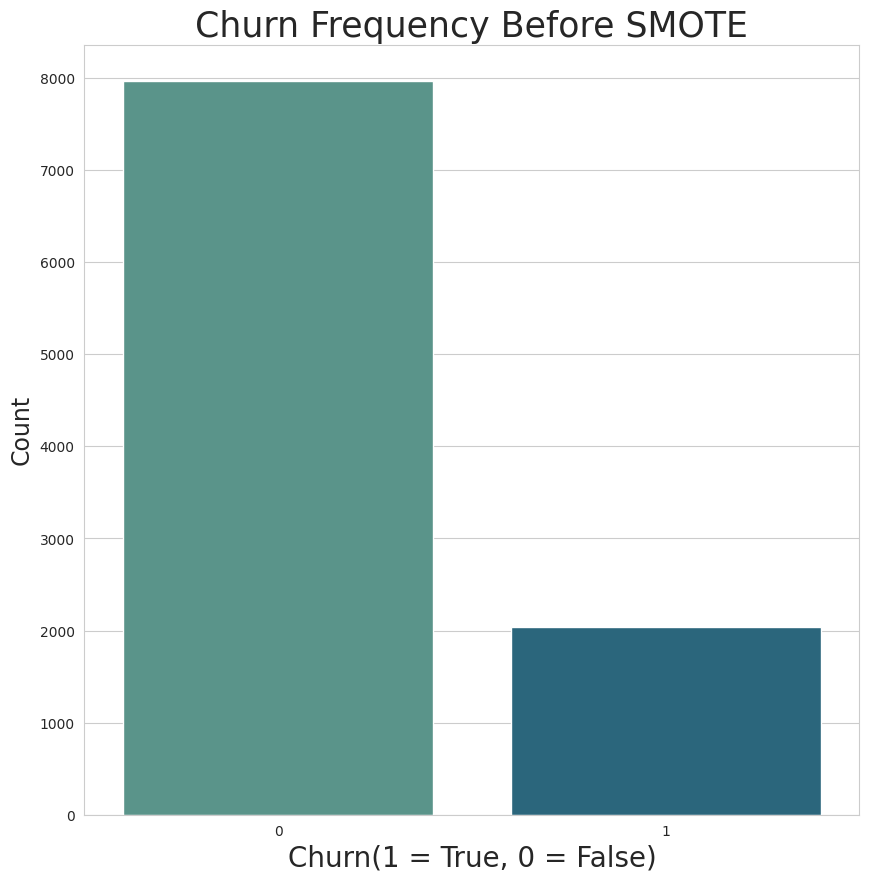

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Imports libraries
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
# Sets grid style and figure size
sns.countplot(x=df["churn"],palette = "crest")
# Creates the bar graph using churn
plt.xlabel("Churn(1 = True, 0 = False)", size = 20)
plt.ylabel("Count", size = 17)
plt.title("Churn Frequency Before SMOTE", size = 25)
#Sets Labels
plt.savefig('Professional Churn Frequency Bar Chart Before SMOTE', dpi = 350)
plt.show()
#Saves and shows the graph

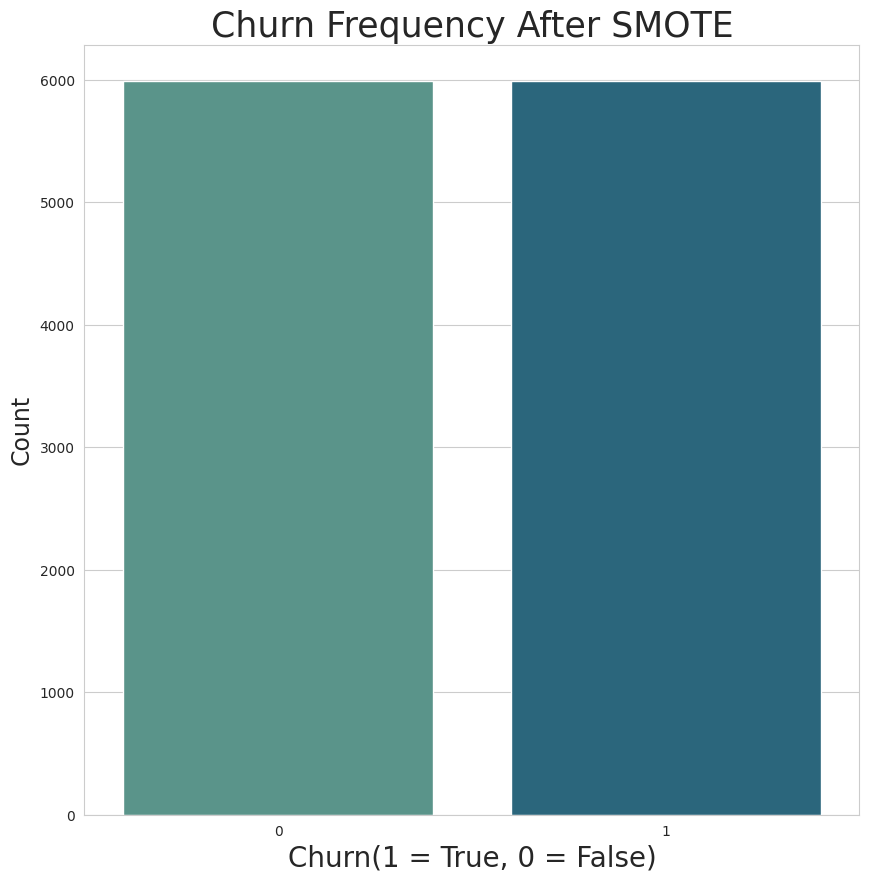

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Imports libraries
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
# Sets grid style and figure size
sns.countplot(x=y_train_resample,palette = "crest")
# Creates the bar graph using churn
plt.xlabel("Churn(1 = True, 0 = False)", size = 20)
plt.ylabel("Count", size = 17)
plt.title("Churn Frequency After SMOTE", size = 25)
#Sets Labels
plt.savefig('Professional Churn Frequency Bar Chart After SMOTE', dpi = 350)
plt.show()
#Saves and shows the graph

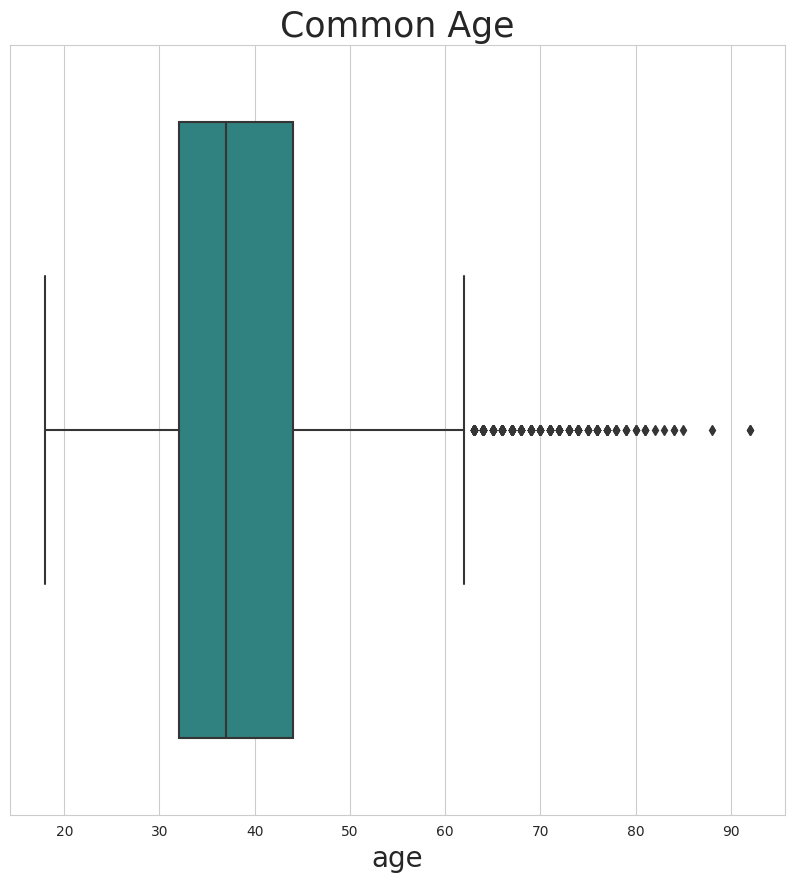

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
#Sets grid style and figure size
plt.title("Common Age", size = 25)
plt.xlabel("Age", size = 20)
#Sets labels
sns.boxplot(x=df['age'], palette='viridis_r')
#Creates boxplots
plt.savefig('Age Majority Boxplot', dpi = 350)
plt.show()
#Shows and saves graph

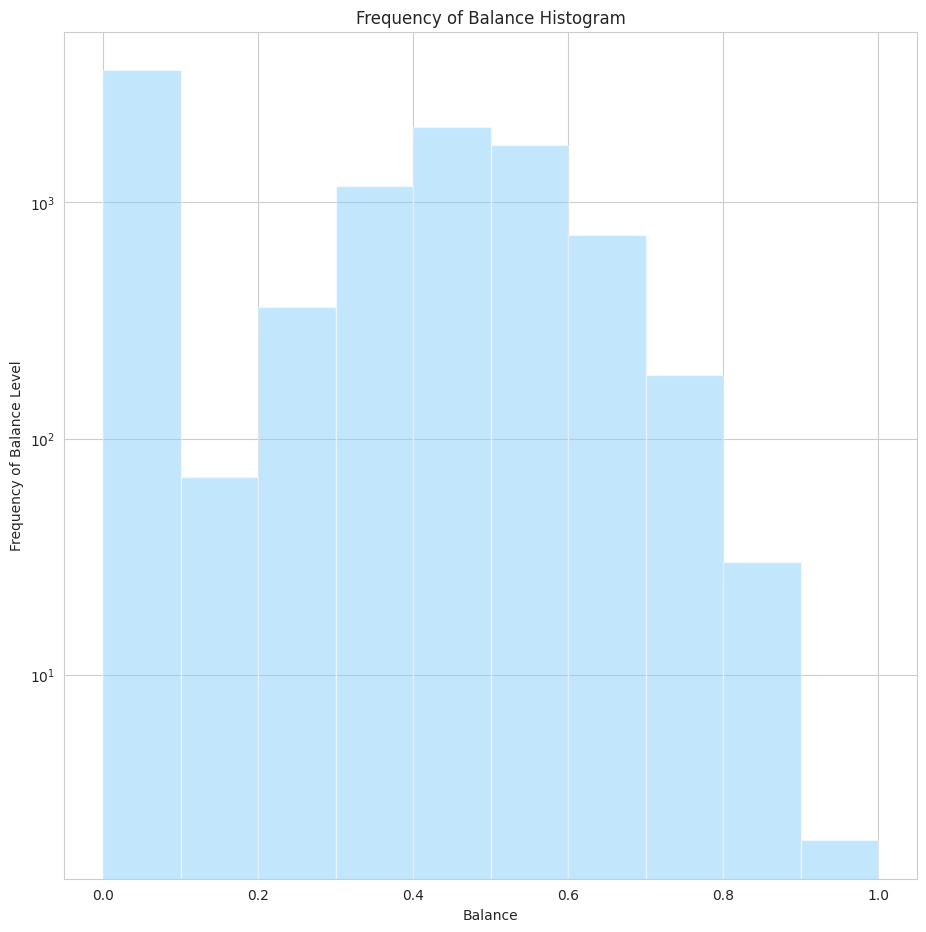

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style()
plt.figure(figsize = (11,11))
#Sets grid style and figure size
plt.title("Frequency of Balance Histogram")
plt.ylabel("Frequency of Balance Level")
plt.xlabel("Balance")
#Sets labels
plt.hist(df['balance'], color = 'lightskyblue', alpha = 0.5, log = True, bins = 10)
#Creates histogram
plt.savefig('Professional Balance Frequency Histogram', dpi = 350)
plt.show()
#Saves and shows graph

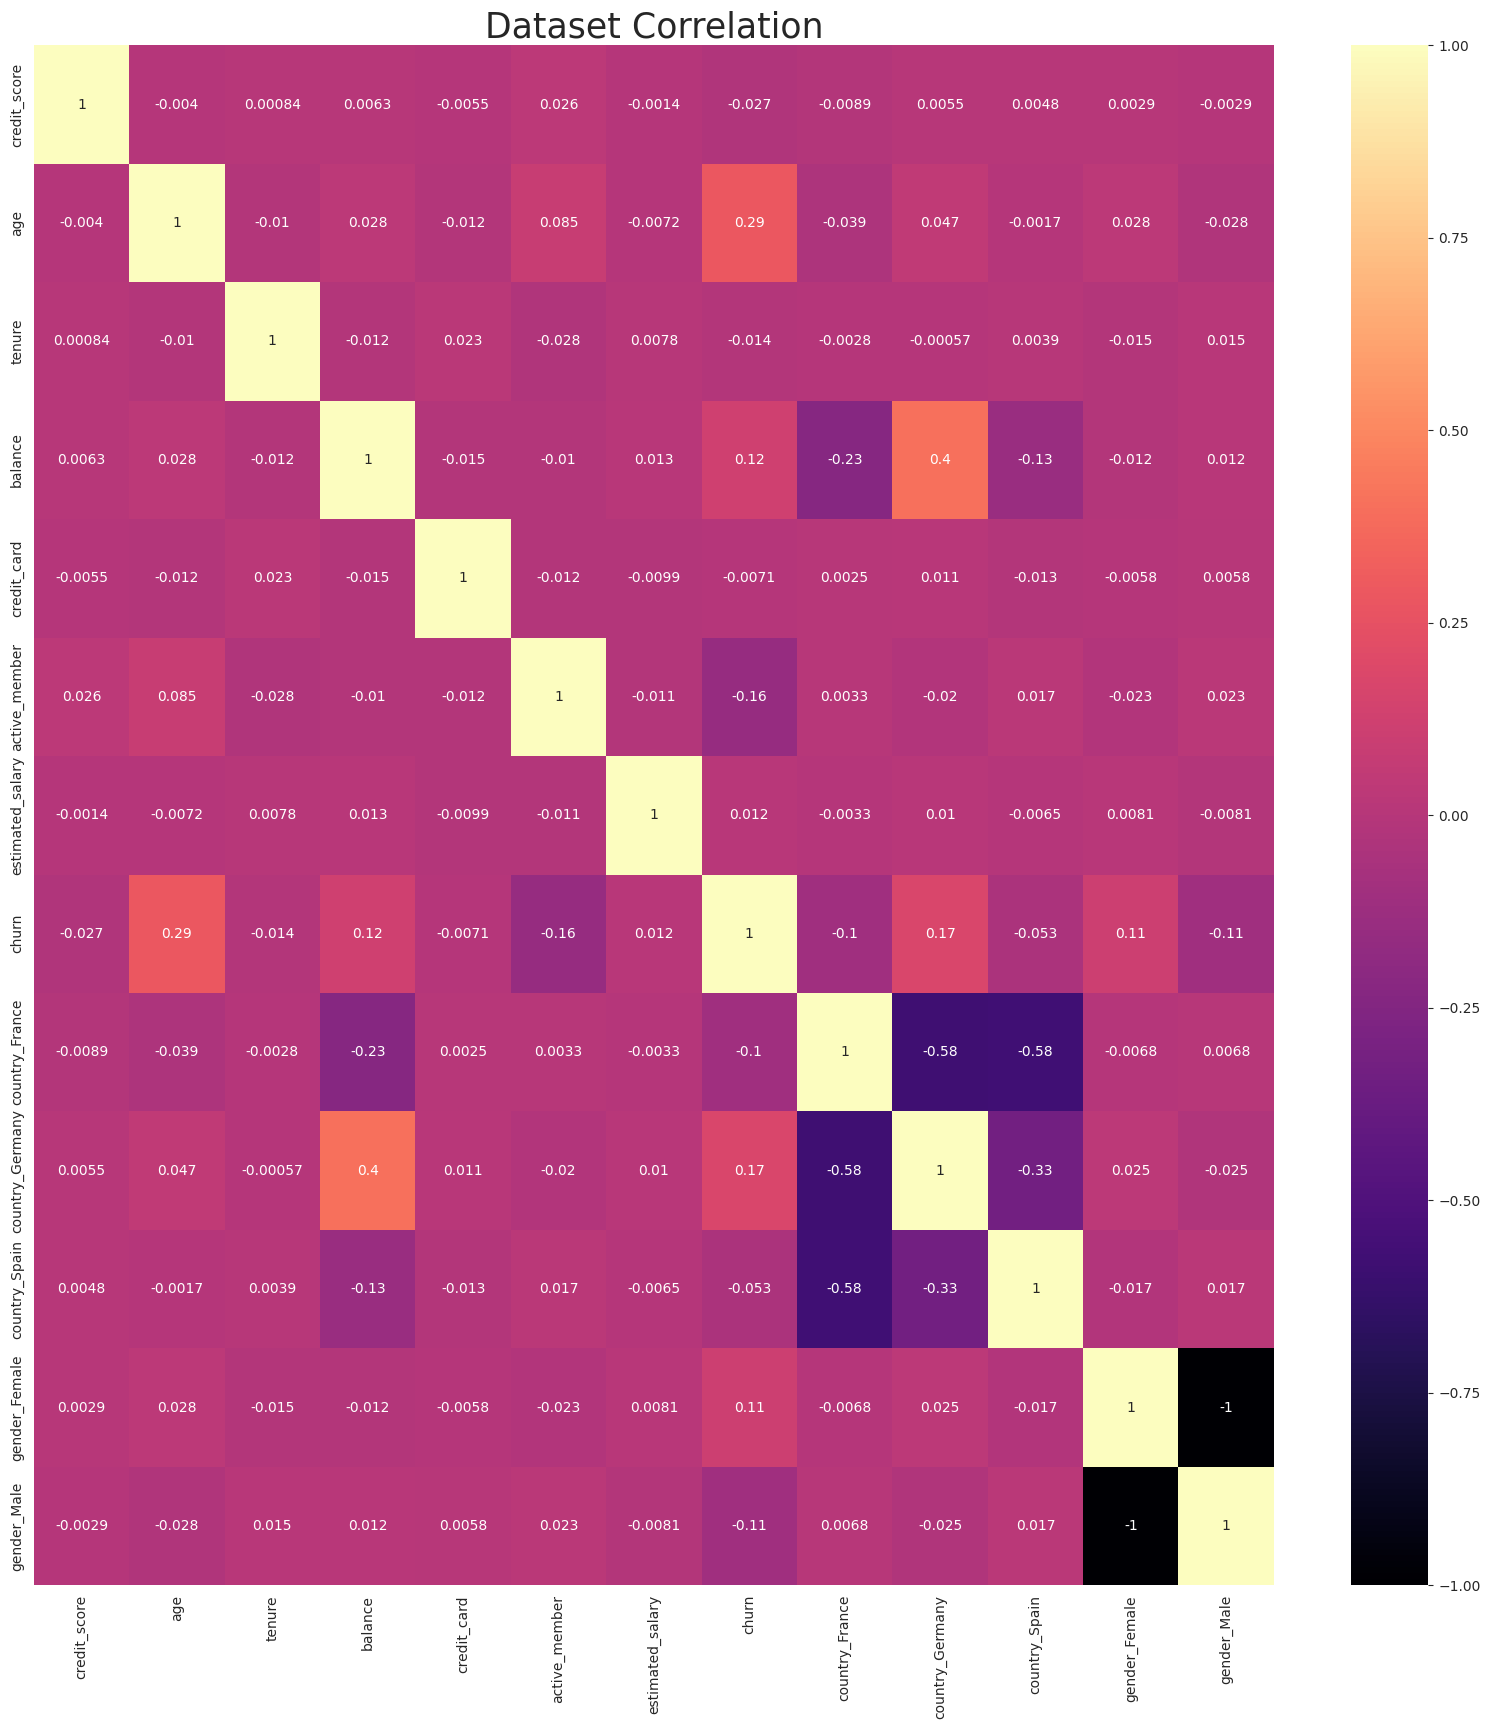

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df2 = pd.get_dummies(df)
plt.figure(figsize=(20,20))
#Sets grid style, figures size, reads data
corr = df2.select_dtypes('number').corr()
#Sets the dataframe's correlation to variable 'corr'
plt.title("Dataset Correlation", size = 25)
#Sets the title
sns.heatmap(corr, cmap = 'magma', annot=True)
#Creates the heatmap with the correlation
plt.savefig('Dataset Correlation Heatmap', dpi = 350)
plt.show()
#Saves and shows the graph

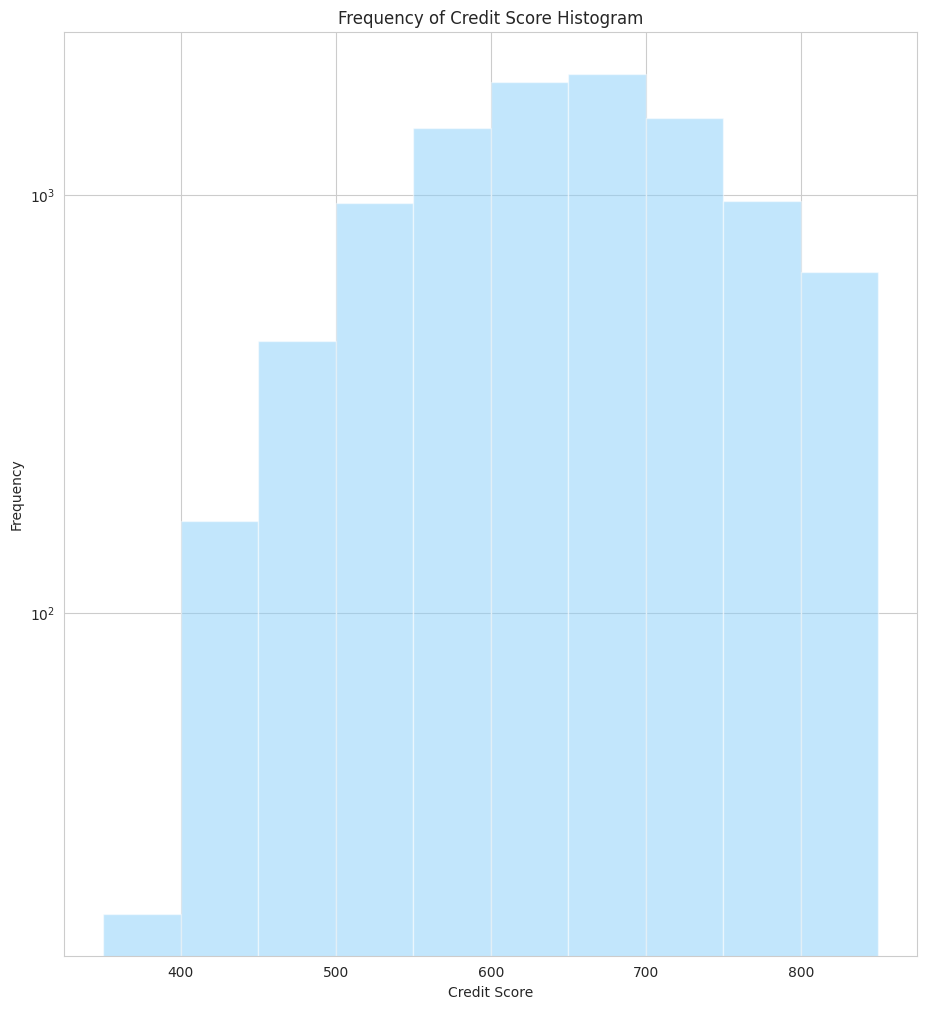

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style('whitegrid')
plt.figure(figsize = (11,12))
plt.title("Frequency of Credit Score Histogram")
plt.ylabel("Frequency")
plt.xlabel("Credit Score")
plt.hist(df['credit_score'], color = 'lightskyblue', alpha = 0.5, log = True, bins = 10)
plt.savefig('Professional Credit Score Frequency Histogram', dpi = 350)
plt.show()


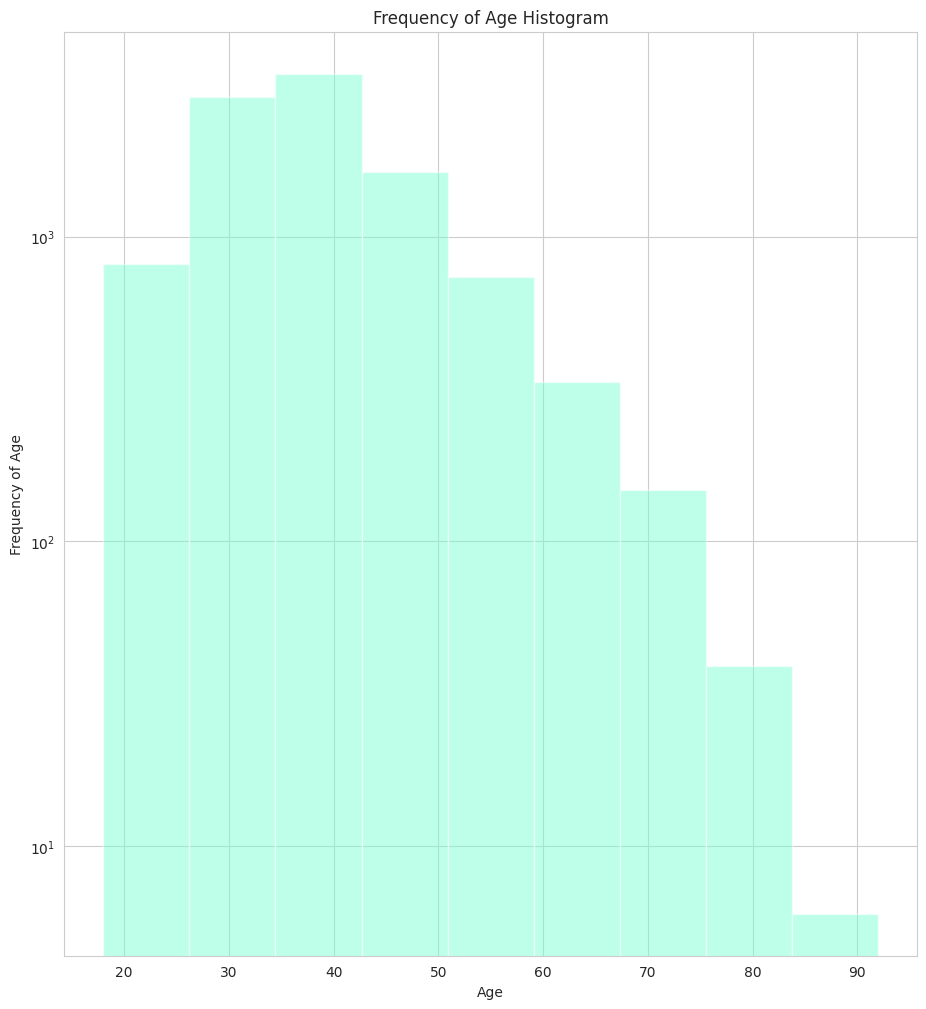

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style("whitegrid")
plt.figure(figsize = (11,12))
plt.title("Frequency of Age Histogram")
plt.ylabel("Frequency of Age")
plt.xlabel("Age")
plt.hist(df['age'], color = 'aquamarine', alpha = 0.5, log = True, bins = 9)
plt.savefig('Professional Age Frequency Histogram', dpi = 350)
plt.show()


# Scatterplot

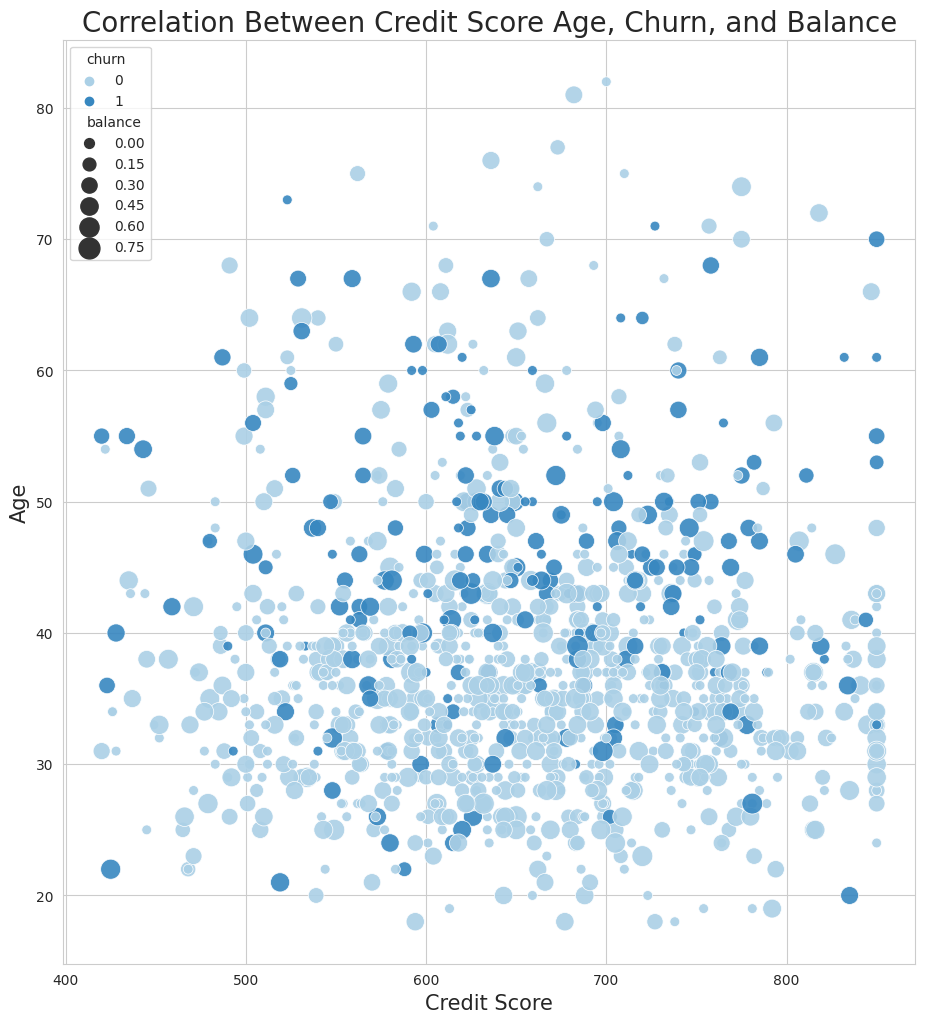

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Imports libraries
df2 = df.sample(n=1100)
sns.set_style("whitegrid")
plt.figure(figsize=(11,12))
#Sets up the dataframe, grid style, figure size
sns.scatterplot(x = df2['credit_score'],
                y = df2['age'],
                hue = df2['churn'],
                size = df2['balance'],
                sizes = (50,250),
                palette = 'Blues',
                alpha=0.9)
#Makes x = Credit Score, y = Age, Colors or hues = Churn, Dot size = balance
plt.title("Correlation Between Credit Score Age, Churn, and Balance", size = 20)

plt.xlabel("Credit Score", size = 15)
plt.ylabel("Age", size = 15)
plt.savefig('Correlation Between Credit Score Age, Churn, and Balance', dpi=300)
plt.show()

Comment: Between age 40 and 60, churn is more apparent
There is no strong linear correlation.

Here is some more information:

In [ ]:
df.corr()
#Shows correlations

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
credit_score,1.000000,-0.003965,0.000842,0.006268,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
age,-0.003965,1.000000,-0.009997,0.028308,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
tenure,0.000842,-0.009997,1.000000,-0.012254,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
balance,0.006268,0.028308,-0.012254,1.000000,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
credit_card,-0.005458,-0.011721,0.022583,-0.014858,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
active_member,0.025651,0.085472,-0.028362,-0.010084,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
churn,-0.027094,0.285323,-0.014001,0.118533,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
country_France,-0.008928,-0.039208,-0.002848,-0.231329,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772
country_Germany,0.005538,0.046897,-0.000567,0.401110,0.010577,-0.020486,0.010297,0.173488,-0.580359,1.000000,-0.332084,0.024628,-0.024628


# Machine Learning

# Machine Learning Model: Random Forest (RESULTS)

In [ ]:
print("The recall accuracy is... ")
Set_Model(RandomForestClassifier()) #The actual accuracy

The recall accuracy is... 
0.8355489360751754


In [ ]:
model_clf = RandomForestClassifier()
model_clf.fit(x_train_resample, y_train_resample)

RandomForestClassifier()

In [ ]:
ForestParams = {'max_depth': [4],'n_estimators':[10], 'bootstrap':[False]}
GridSearch(RandomForestClassifier(), ForestParams)

{'bootstrap': False, 'max_depth': 4, 'n_estimators': 10}
0.796273795228193


The raw RandomForestClassifier returns a good accuracy but with the most optimal parameters, the accuracy actually decreases and so that is why we should prefer the raw model.

The next code describes the weights of each x column onto predicting the y. All of them add up to 1. This shows the top 8 contributors

In [ ]:
model_clf.feature_importances_


# Show dictionary of top 5 features in order
feature_dict = dict(zip(x.columns, model_clf.feature_importances_))
import operator
sorted(feature_dict.items(), key=operator.itemgetter(1),
reverse=True)[0:8]

[('age', 0.21101361245609693),
 ('balance', 0.1373179890108606),
 ('estimated_salary', 0.10669159698395722),
 ('active_member', 0.09879374537753685),
 ('credit_score', 0.09664768384599727),
 ('gender_Male', 0.06428463518727971),
 ('country_France', 0.06220076070384554),
 ('tenure', 0.06000084281214475)]

# Threshold

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
#Splitting the x and y to train and test datasets


In [ ]:
#y.iloc[predictstart : predictend]

In [ ]:
#Random Import Statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#The best so far
Set_Model(RandomForestClassifier())
ForestParams = {'max_depth': [4],'n_estimators':[10], 'bootstrap':[False]}

0.8350494972110708


In [ ]:
model_clf = RandomForestClassifier()
model_clf.fit(x_train_resample, y_train_resample)
print(model_clf.score(x_test, y_test))

0.9576


In [ ]:
predictions = model_clf.predict_proba(x_test)[:,-1]
thresholds = np.unique(predictions)
print(thresholds)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [ ]:
recall_scores = np.zeros((len(thresholds))) #Creates an empty array or an array of zeros for each unique value or threshold for the variable thresholds

for i in range(len(thresholds)):
  temp_prediction = round_threshold(predictions, thresholds[i])#Rounds predictions to 1 or 0
  recall_scores[i] = f1_score(y_test, temp_prediction)# Verifies and scores(checks) the predictions made ealier to the y test
print(recall_scores) #Prints the scores

[0.36880927 0.39060753 0.41756487 0.44596326 0.47294225 0.49380362
 0.51907631 0.54574299 0.56624519 0.5893887  0.60822898 0.62461727
 0.64434618 0.65844156 0.67692308 0.69320522 0.70886076 0.72635379
 0.73391813 0.74776119 0.75700227 0.77089783 0.7835703  0.7936
 0.79837398 0.80395387 0.81099084 0.8185654  0.82623509 0.83204134
 0.8378144  0.84487292 0.85008818 0.86175943 0.86564472 0.86932849
 0.87305936 0.87442713 0.87985213 0.88104089 0.88306829 0.88867925
 0.89373814 0.89694656 0.89635317 0.89835431 0.89902913 0.89776047
 0.89756098 0.89675516 0.89546351 0.89525692 0.8950495  0.89395441
 0.89374379 0.89442231 0.894      0.89156627 0.89112903 0.88414634
 0.8845761  0.8788501  0.87487073 0.87318087 0.86729363 0.84680851
 0.83243243 0.81538462 0.8        0.78231293 0.76267281 0.74238876
 0.72294887 0.7092883  0.69277846 0.67493797 0.65829146 0.64892269
 0.63333333 0.60653595 0.584      0.56292287 0.52367688 0.49072753
 0.45997089 0.44247788 0.40963855 0.3803681  0.35054773 0.3168
 0.

In [ ]:
best_score_index = np.argmax(recall_scores) # Find the index of the maximum value of f1_scores
best_threshold = thresholds[best_score_index]
print("Best threshold is "  + str(best_threshold))

Best threshold is 0.46


Before Using Thresholds

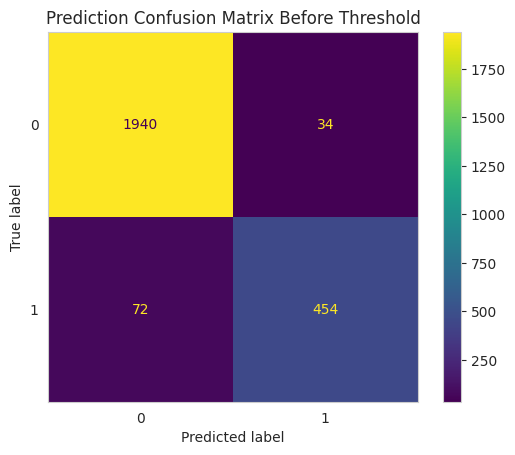

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_clf, x_test, y_test)
plt.grid()
plt.title("Prediction Confusion Matrix Before Threshold")
plt.savefig('Prediction Confusion Matrix Before Threshold', dpi = 200)
plt.show()

After Using Thresholds

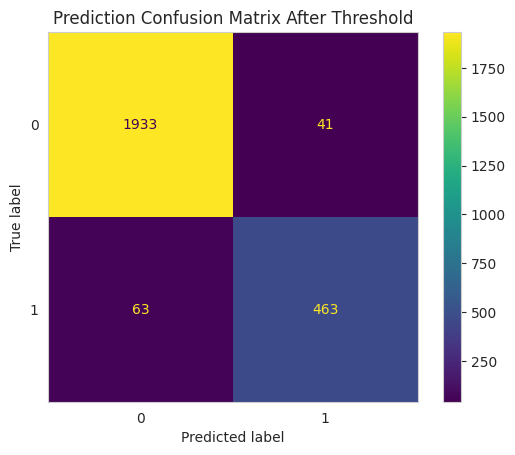

In [ ]:
predictions_at_thresh = round_threshold(predictions, best_threshold)
ConfusionMatrixDisplay.from_predictions(y_test, predictions_at_thresh, labels=model_clf.classes_)


plt.grid()
plt.title("Prediction Confusion Matrix After Threshold")
plt.savefig('Prediction Confusion Matrix After Threshold', dpi = 350)

plt.show()

As we can see here, the algorithm does bettwer without threshold which means that I will keep the raw Random Forest Classifier

# Appendix

Here is my Machine Learning notebook for more models: https://colab.research.google.com/drive/1sUAvEyxGA8tUYWr6YHlki-DgOG5o3BKl?usp=sharing

Here is my Neural Network Notebook: https://colab.research.google.com/drive/1uzrKo-6gTVPls-QXfSCb1D3O5mo5TGyn?usp=sharing

False negatives are more harmful than false positives because even if a customer is given a deal which loses the bank money, the deal still increases the customer's incentive to stay therefore increasing retetnention and money in the long term. If we prefer a false negative, we lose the customer all together which means that we lose money in the short term and the long term which is much worse and not recovered than prefering a false positive. This means that we should prefer the recall scoring metric or prefer false positives.

## To find the best parameters for the random forest classifier, I used Grid SearchCv here is the code:

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {'max_depth': [2], 'subsample': [0.6], 'colsample_bylevel':[0,1], 'colsample_bytree': [0,1]} # Test Params

def GridSearch(model, params, random = False): #Intailizes the function

  if random:
    grid_reg = RandomizedSearchCV(model, params, scoring = 'recall') #Searches for the best params by testing every single mix
  else:
    grid_reg = GridSearchCV(model, params, scoring = "recall") #Does ten mixtures and shows the best params from the mixs. (Good for a starting point)

  grid_reg.fit(x_train_resample, y_train_resample) #Fits the resampled variables to the GridSearch model. Remember that GridSearch is model that searches for parameters through another model so it still needs data to fit and test.

  best_params =  grid_reg.best_params_

  scores = grid_reg.best_score_

  #rmse = (-scores) **0.5

  print(best_params)
  print(scores)

In [ ]:
GridSearch(RandomForestClassifier(), ForestParams)

{'bootstrap': False, 'max_depth': 4, 'n_estimators': 10}
0.8016232847003429


What was observed was that parameters actually made the code worse. So that is why there are no parameters used in the Random Forest Classifier model.

The Most Influential Columns can be quantified by this code:

In [ ]:
model_clf.feature_importances_


# Show dictionary of top 5 features in order
feature_dict = dict(zip(x.columns, model_clf.feature_importances_))
import operator
sorted(feature_dict.items(), key=operator.itemgetter(1),
reverse=True)[0:5]

[('age', 0.20721505299323495),
 ('balance', 0.14423698782959743),
 ('estimated_salary', 0.10797322235416199),
 ('active_member', 0.10428670279130077),
 ('credit_score', 0.09660520953319968)]